In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("loan.csv",low_memory=False)

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.shape

(39717, 111)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
data.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
loan=data

In [8]:
loan.isna().sum()/len(loan.index)*100 #missing value Proportion

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [9]:
#columns with more than 90 % missing value
missing_cols=loan.columns[loan.isna().sum()/len(loan.index)*100 >90]

In [10]:
len(missing_cols)

56

In [11]:
loan=loan.drop(missing_cols,axis=1)

In [12]:
loan.shape

(39717, 55)

In [13]:
loan.isna().sum()/len(loan.index)*100 

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [14]:
loan=loan.drop(['desc','mths_since_last_delinq'],axis=1)# droping these columns since they have missing value proportion more than 30 percentage

In [15]:
# checking for missing values again
loan.isna().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [16]:
#getting missing value proportion
loan.isna().sum()/len(loan.index)*100 

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [17]:
# cleaning int_rate column
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [18]:
#removing percentage sign and converting to numeric column
loan['int_rate']=loan['int_rate'].str.replace("%","").astype(float)

In [19]:
#removing percentage sign and converting to numeric column
loan['revol_util']=loan['revol_util'].str.replace("%","").astype(float)

In [20]:
loan['emp_length'] # cleaning the column

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [21]:
#since emp_length has 1075 we drop the null values in emp_length
loan=loan[~loan['emp_length'].isnull()] #getting rows where emp_length is  not null value

In [22]:
#convertin emp_length to numeric
import re

In [23]:
loan['emp_length']=loan['emp_length'].apply(lambda x:re.findall('\d+',str(x))[0]).astype(int)

In [24]:
loan['loan_status'].value_counts() #getting value_counts of target variable

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [25]:
#consider only "Fully Paid" and "Charged Off"
loan=loan[loan['loan_status']!='Current']
loan['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [26]:
# removing nan value and filling with mean
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [27]:
loan['pub_rec_bankruptcies'].mode()

0    0.0
dtype: float64

In [28]:
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(0.0)

In [29]:
loan['pub_rec_bankruptcies'].unique()

array([0., 1., 2.])

In [30]:
#feature Engineering

In [31]:
from datetime import datetime
loan['issue_d']=loan['issue_d'].apply(lambda x:datetime.strptime(x,'%b-%y'))

In [32]:
loan['issue_d_month']=loan['issue_d'].apply(lambda x:x.month) #extracting month

In [33]:
loan['issue_d_year']=loan['issue_d'].apply(lambda x:x.year) #extracting year

In [30]:
# loan['pymnt_plan'] not needed since it has only one value and no info will be provided
# loan['earliest_cr_line'] not needed
#loan['initial_list_status']  not needed since it has only one value and no info will be provided
#loan['out_prncp_inv'] not needed since it has only one value and no info will be provided
#loan['collections_12_mths_ex_med'] not needed since it has only 0 value and null value  and no info will be provided
#loan['policy_code'] not needed since it has only one value and no info will be provided
# loan['application_type'] not needed since it has only one value and no info will be provided
#loan['acc_now_delinq']not needed since it has only one value and no info will be provided 
#loan['delinq_amnt']not needed since it has only one value and no info will be provided 
#loan['tax_liens'] not needed since it has only one value and no info will be provided 

In [34]:
#loan['last_pymnt_d_month']=loan['last_pymnt_d'].apply(lambda x:x.month)

In [35]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_d_month', 'issue_d_year'],
      dtype='object')

In [66]:
req_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens', 'issue_d_month', 'issue_d_year','loan_status']

In [67]:
loan[req_cols]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,issue_d_month,issue_d_year,loan_status
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,0.00,171.62,0.0,0.0,0.0,12,2011,Fully Paid
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,...,0.00,117.08,1.11,119.66,0.0,0.0,0.0,12,2011,Charged Off
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,0.00,649.91,0.0,0.0,0.0,12,2011,Fully Paid
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,16.97,0.00,0.00,357.48,0.0,0.0,0.0,12,2011,Fully Paid
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,0.00,161.03,0.0,0.0,0.0,12,2011,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,MORTGAGE,...,0.00,0.00,0.00,80.90,NaN,0.0,NaN,7,2007,Fully Paid
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,RENT,...,0.00,0.00,0.00,281.94,NaN,0.0,NaN,7,2007,Fully Paid
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,MORTGAGE,...,0.00,0.00,0.00,0.00,NaN,0.0,NaN,7,2007,Fully Paid
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,MORTGAGE,...,0.00,0.00,0.00,0.00,NaN,0.0,NaN,7,2007,Fully Paid


In [68]:
loan[req_cols].to_csv("loan-processed.csv",index=False)

In [69]:
new_data = pd.read_csv("loan-processed.csv")

In [70]:
new_data.isna().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
purpose                      0
dti                          0
delinq_2yrs                  0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  47
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
chargeoff_within_12_mths    56
pub_rec_bankruptcies         0
tax_liens                   39
issue_d_

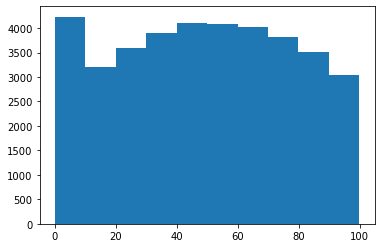

In [71]:
plt.hist(new_data['revol_util'])
plt.show()

In [72]:
median_ru = new_data['revol_util'].median()
new_data['revol_util'] = new_data['revol_util'].fillna(median_ru)

In [73]:
new_data = new_data.drop("chargeoff_within_12_mths",axis=1)

In [74]:
new_data = new_data.drop("tax_liens",axis=1) # since the columne has only 0 and nan value we can drop it

In [75]:
new_data.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
issue_d_month              0
issue_d_year               0
loan_status                0
dtype: int64

In [76]:
new_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [77]:
new_data["term"] = new_data['term'].map({' 36 months':36,' 60 months':60})

In [78]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  int64  
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [79]:
new_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data["grade"] = le.fit_transform(new_data['grade'])

In [81]:
new_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [82]:
new_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [83]:
new_data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [84]:
new_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [85]:
new_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year', 'loan_status'],
      dtype='object')

In [86]:
new_data.shape

(37544, 33)

In [87]:
x = new_data.drop("loan_status",axis=1)
y = new_data['loan_status']

In [88]:
x['grade']

0        1
1        2
2        2
3        2
4        0
        ..
37539    0
37540    2
37541    0
37542    0
37543    4
Name: grade, Length: 37544, dtype: int32

In [93]:
x = pd.get_dummies(x)

In [96]:
num_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment','emp_length',
       'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year']

# Scaling

In [97]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x.loc[:,num_cols] = sc.fit_transform(x[num_cols])

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,
                                                    test_size=0.2,random_state=134)

# Model Building

In [99]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

0.9930749766946331

In [100]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.99


In [101]:
## knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.9090424823545079

In [109]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.99


In [102]:
### svm
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
accuracy_score(y_test, y_pred)

0.9826874417365827

In [110]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.99


In [104]:
#### decision trees    # no scaling 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.9922759355440138

In [111]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.99


In [108]:
####### random forest classifier
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier()
rt.fit(x_train, y_train)
y_pred = rt.predict(x_test)
accuracy_score(y_test, y_pred)

0.9944067119456652

In [112]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.99


In [105]:
###### bagging classifier 
bs_et = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator=bs_et, n_estimators= 200)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)
accuracy_score(y_test, y_pred)

0.9954721001464909

In [113]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 0.99


# cross validated scores

In [106]:
#cross validated decision tree

from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()

cv_results = cross_val_score(dt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9884663426087238

In [114]:
#cross validated random forest

from sklearn.model_selection import cross_val_score
rt = RandomForestClassifier()

cv_results = cross_val_score(rt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9942466128197222

In [115]:
#cross validated Bagging Classifier

from sklearn.model_selection import cross_val_score
bg = BaggingClassifier(base_estimator=bs_et, n_estimators= 200)
cv_results = cross_val_score(bg, x, y, cv = 5, scoring="accuracy")
cv_results.mean()

0.9949657214751995